In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

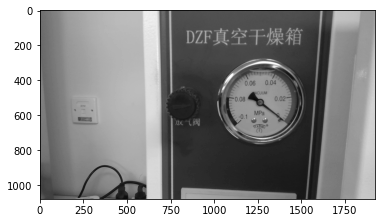

In [12]:
def detect():
    #Load image
    #cimg = cv2.imread('C:/Users/Sara/Desktop/oven_panel/meter/5.jpg')
    #cimg = cv2.imread('C:/Users/Sara/Desktop/oven_panel/meter/6_Color.png')
    cimg = cv2.imread('C:/Users/Sara/Desktop/oven_panel/meter/imageset_2/14.JPG')
    img = cv2.cvtColor(cimg,cv2.COLOR_RGB2GRAY)
    img_w = img.shape[1]
    img_h = img.shape[0]
    imshow(img,cmap='gray')

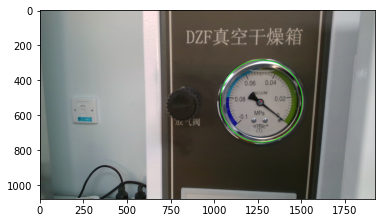

In [13]:
    #Find circle opencv
    #https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#houghcircles

    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,dp=3,minDist=20,
                                param1=50,param2=40,minRadius=100,maxRadius=250)

    draw_img = np.copy(cimg)
    circles = np.uint16(np.around(circles))
    x,y,r = circles[0,0,:]
    cv2.circle(draw_img,(x,y),r,(0,255,0),2)
    cv2.circle(draw_img,(x,y),2,(255,0,0),3)

    imshow(draw_img)

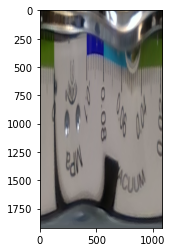

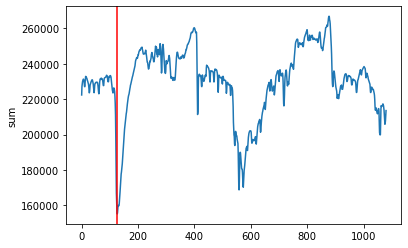

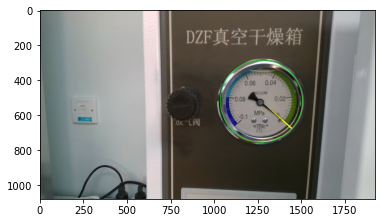

angle: 318.0


In [14]:
    #Find arrow

    #Warp forward
    cwarped = cv2.linearPolar(cimg,(x,y),r,cv2.WARP_FILL_OUTLIERS)
    cwarped = cv2.rotate(cwarped, cv2.ROTATE_90_COUNTERCLOCKWISE);

    plt.plot()
    plt.imshow(cwarped)
    plt.show()

    #Calculate column sum and minimum
    warped = cv2.cvtColor(cwarped,cv2.COLOR_RGB2GRAY)
    col_sum = np.sum(warped, axis=0)
    indx = np.argmin(col_sum)

    cols = warped.shape[1]
    angle_degrees = 360.0-(indx/cols)*360.0

    #Plot
    plt.plot(col_sum)
    plt.ylabel('sum')
    plt.axvline(x=indx,c='r')
    plt.show()

    #Draw and warp back
    cwarped[:,indx-3:indx+3] = (255,255,0)
    cwarped = cv2.rotate(cwarped, cv2.ROTATE_90_CLOCKWISE);
    inv_warped = cv2.linearPolar(cwarped,(x,y),r,cv2.WARP_INVERSE_MAP)
    # plt.imshow(inv_warped)
    # plt.show()

    #Combine results
    mask = np.zeros(img.shape,np.uint8)
    cv2.circle(mask, (x,y), r, 255, -1)
    inv_mask = cv2.bitwise_not(mask)
    # plt.imshow(mask)
    # plt.show()

    res = cv2.bitwise_and(inv_warped,inv_warped,mask=mask) + cv2.bitwise_and(cimg,cimg,mask=inv_mask)
    cv2.circle(res,(x,y),r,(0,255,0),2)
    cv2.circle(res,(x,y),2,(255,0,0),3)
    plt.imshow(res)
    plt.show()

    print('angle:', angle_degrees)
    return(angle_degrees)